Spaceship Titanic Survival Prediction 
===
Predict which passengers are transported to an alternate dimension   
Reference: https://www.kaggle.com/competitions/spaceship-titanic

### 參賽流程摘要
1. 比賽故事背景   
     在公元2912年，太空郵輪「泰坦尼克號」在繞行半人馬座阿爾法星時，不慎與一個隱藏在塵埃雲中的時空異常相撞，導致將近一半的13,000名乘客傳送到了一個不同的維度。我們需要來解開這個宇宙謎團。
2. 選擇比賽的原因、資料集、目標介紹   
     這個比賽是Kaggle上的常駐練習型比賽，屬於titanic的進階版，有更多的參數需要進行考量，我認為這會是一個很好的課程延伸學習方向，目標是達到80%的Accuracy。且Kaggle有提供完整的資料庫，包括: 訓練集、測試集、輸出範例等。
2. 實作方式、跟上課的關聯性、延伸學習的部分   
     實作方式會以Vscode連結JupyterNotebook進行開發，搭配上課titanic的課程教材，先使用Logistic Regression模型進行機器學習，觀察其效果，並在網路上尋找更進階的模型應用，以及資料處理技巧。
3. 比賽結果、不同的嘗試與結果分析、改善方向   
     運用Logistic模型嘗試採用不同的參數訓練，可得到約79%的正確率。使用網路上的大神做法(不同資料處理方式or不同預測模型)可得到大於80%的正確率，達成目標。未來改善的方向可以是如同作業一，採用不同訓練集與測試集比例，或者使用不同的randon數值。

## 實驗方法  
1. 運用課堂在titanic_survival_prediction的資料處理技巧進行spaceship titanic資料的前處理
2. 理解所有參數代表的意義，再觀察數據之間的相關性，除卻不相關的參數，及避免double counting問題
3. 使用LogisticRegression模型進行實驗，觀察其預測效果，思考能優化的作法
4. 上網查詢各路大神的思考方式，並嘗試實作一篇進行學習

### 使用函式簡介
1. pandas: 強大的資料操作和分析庫，提供了廣泛的函數和方法，用於處理結構化數據。
2. numpy: 專注於數值計算，並提供了廣泛的函數和能力，用於處理數組和矩陣。
3. matplotlib: 用於創建2D和3D靜態、動畫和互動可視化。它提供了廣泛的函數和功能，用於創建各種類型的圖表和圖表。
4. seaborn: 一個建立在Matplotlib之上的Python數據可視化庫，使創建具有信息性和吸引力的統計圖形變得更容易。
>*參考來源: chatGPT*

In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

從本地端引入資料進行分析

In [127]:
#import dataset
df=pd.read_csv("C:\\Users\\timta\\Desktop\\courses\\machine learning\\local\\spaceship\\train.csv")
#observing dataset
#show the first n terms in the data(default = 5)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


展示資料的統計結果，以便對數據有更多的理解

In [128]:
#observe the whole data condition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


從上述分析可以看出資料共有8693筆，而完整無缺漏的僅PassengerId和Transported  
再來前處理前，查看其他參數跟目標Transported有無直接關聯

In [129]:
#specific data observing 
df.groupby('Transported').mean(numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


由於本實驗在跑數據圖或是預測模型會有大量的警告訊息，會使頁面混亂，因此加上本指令以維持可讀性

In [130]:
import warnings
#ignore all the warnings from scikit-learn
warnings.filterwarnings("ignore")

由於Age在數據中呈現較無關聯，因此我們來觀察數據中Age的分布情形

<Axes: xlabel='Age', ylabel='Density'>

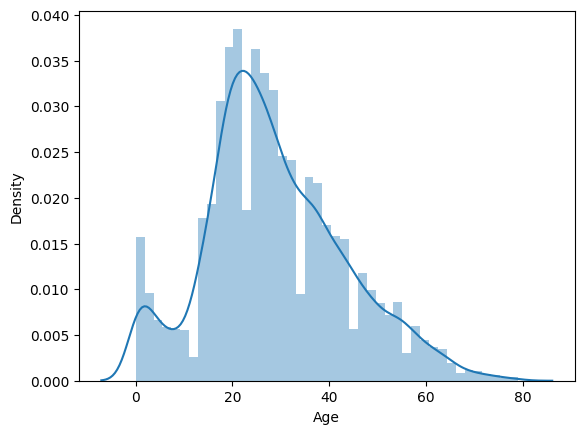

In [131]:
sns.distplot(df['Age'])

將所有資料庫中的資料兩兩比對
(利用dropna=True去忽略空值)

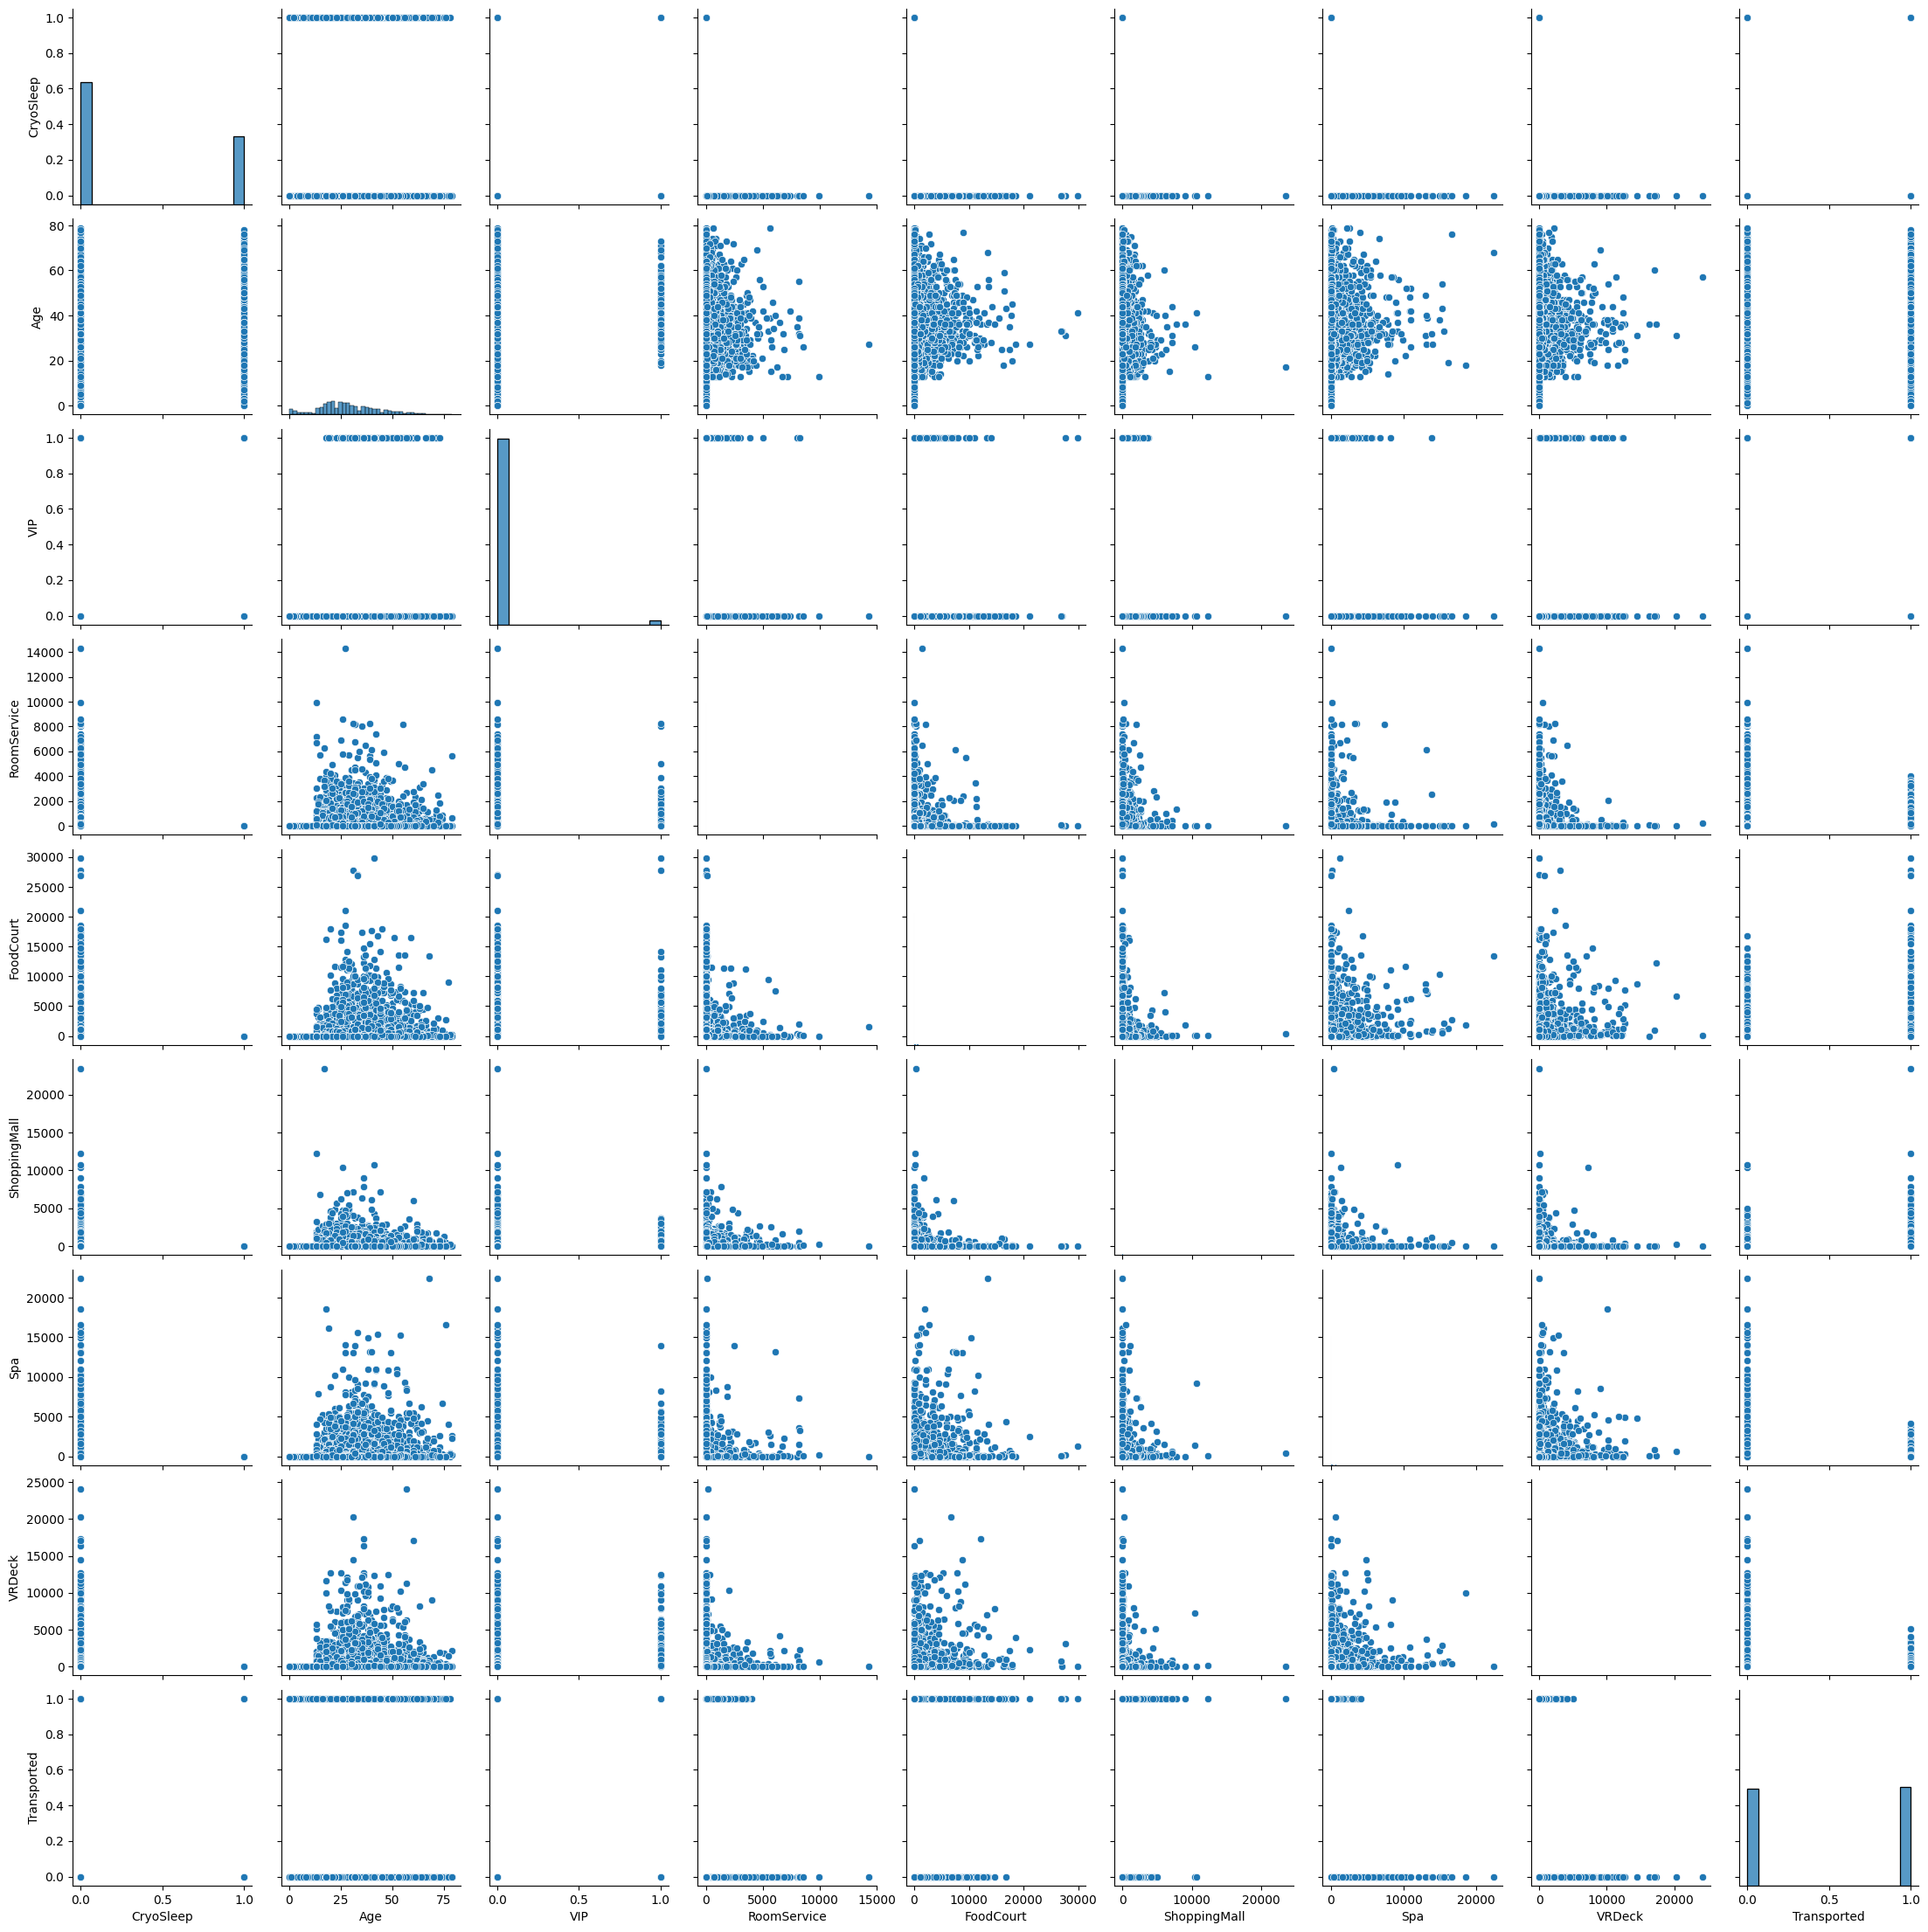

In [132]:
sns.pairplot(df,dropna=True)

觀察完可數字化的參數後，發現每一種參數似乎都對結果是有一定影響力，故選擇暫時將其全部留下，接下來開始觀察還沒數字化的參數

In [133]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

HomePlanet共三種類別，接下來用將其轉化為數值1,2,3，並用數量最多的那個類別"Earth"填補空值

In [134]:
df["HomePlanet"].fillna(df["HomePlanet"].value_counts().idxmax(),inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['HomePlanet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        8693 non-null   object 
 1   CryoSleep          8476 non-null   object 
 2   Cabin              8494 non-null   object 
 3   Destination        8511 non-null   object 
 4   Age                8514 non-null   float64
 5   VIP                8490 non-null   object 
 6   RoomService        8512 non-null   float64
 7   FoodCourt          8510 non-null   float64
 8   ShoppingMall       8485 non-null   float64
 9   Spa                8510 non-null   float64
 10  VRDeck             8505 non-null   float64
 11  Name               8493 non-null   object 
 12  Transported        8693 non-null   bool   
 13  HomePlanet_Earth   8693 non-null   int32  
 14  HomePlanet_Europa  8693 non-null   int32  
 15  HomePlanet_Mars    8693 non-null   int32  
dtypes: bool(1), float64(6), 

轉化成功後，"HomePlanet"變成3項，但是從邏輯上可推斷同為乘客必有一項為1，且另兩項為0，故刪除其一以避免double counting

In [135]:
df.drop('HomePlanet_Mars', axis=1, inplace=True)

再來我們用同樣手法處理Destination

In [136]:
df["Destination"].fillna(df["Destination"].value_counts().idxmax(),inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['Destination'])

In [137]:
df.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)

接下來判斷name的相關性應與目標不高，且PassengerId應有更高的相關性，故捨棄Name

In [138]:
df.drop('Name', axis=1, inplace=True)

觀察一下目前資料處理的狀況，尚須處理的數據還有PassergerId及Cabin

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8476 non-null   object 
 2   Cabin                      8494 non-null   object 
 3   Age                        8514 non-null   float64
 4   VIP                        8490 non-null   object 
 5   RoomService                8512 non-null   float64
 6   FoodCourt                  8510 non-null   float64
 7   ShoppingMall               8485 non-null   float64
 8   Spa                        8510 non-null   float64
 9   VRDeck                     8505 non-null   float64
 10  Transported                8693 non-null   bool   
 11  HomePlanet_Earth           8693 non-null   int32  
 12  HomePlanet_Europa          8693 non-null   int32  
 13  Destination_55 Cancri e    8693 non-null   int32

先來處理Cabin，從文件中可以知道Cabin格式為G/734/S，代表的意義是deck/num/side   
因此我們建立這三項column以將Cabin細分
>*方法參考來源: chatGPT*

In [140]:
df['deck'] = ""
df['num'] = ""
df['side'] = ""
for index, row in df.iterrows():
    cabin_value = row['Cabin']
    if pd.notna(cabin_value):
        elements = cabin_value.split("/")
        if len(elements) == 3:
            df.at[index, 'deck'] = elements[0]
            df.at[index, 'num'] = elements[1]
            df.at[index, 'side'] = elements[2]

轉化成功後，發現有些空值需要處理，且這些空值是用""表示   
因此首要目標先把三項資料空值處理好，採用的方法是將最多的替換空值，但是如果空值是最多的，則使用第二多的類別
最後將三項column依照前述作法轉換為dummy variable並根據數據特行選擇性消除其一元素

In [141]:
if(df['deck'].value_counts().idxmax()!=""):
    df['deck'].replace("", df['deck'].value_counts().idxmax(), inplace=True)
else:
    df['deck'].replace("", df['deck'].value_counts().index[1], inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['deck'])

觀察其效果，可發現deck已轉化成多個項次

In [142]:
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,num,side,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,P,0,1,0,0,0,0,0,0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,S,0,0,0,0,0,1,0,0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,S,1,0,0,0,0,0,0,0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,S,1,0,0,0,0,0,0,0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,S,0,0,0,0,0,1,0,0


再來使用相同作法處理side和刪除num，並刪除原本的column

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8476 non-null   object 
 2   Cabin                      8494 non-null   object 
 3   Age                        8514 non-null   float64
 4   VIP                        8490 non-null   object 
 5   RoomService                8512 non-null   float64
 6   FoodCourt                  8510 non-null   float64
 7   ShoppingMall               8485 non-null   float64
 8   Spa                        8510 non-null   float64
 9   VRDeck                     8505 non-null   float64
 10  Transported                8693 non-null   bool   
 11  HomePlanet_Earth           8693 non-null   int32  
 12  HomePlanet_Europa          8693 non-null   int32  
 13  Destination_55 Cancri e    8693 non-null   int32

In [144]:
if(df['side'].value_counts().idxmax()!=""):
    df['side'].replace("", df['side'].value_counts().idxmax(), inplace=True)
else:
    df['side'].replace("", df['side'].value_counts().index[1], inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['side'])

In [149]:
df.drop("Cabin", axis=1, inplace=True, errors="ignore")
df.drop('side_S', axis=1, inplace=True, errors="ignore")
df.drop('num', axis=1, inplace=True, errors="ignore")

再來觀察一下目前的數據狀況

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8476 non-null   object 
 2   Age                        8514 non-null   float64
 3   VIP                        8490 non-null   object 
 4   RoomService                8512 non-null   float64
 5   FoodCourt                  8510 non-null   float64
 6   ShoppingMall               8485 non-null   float64
 7   Spa                        8510 non-null   float64
 8   VRDeck                     8505 non-null   float64
 9   Transported                8693 non-null   bool   
 10  HomePlanet_Earth           8693 non-null   int32  
 11  HomePlanet_Europa          8693 non-null   int32  
 12  Destination_55 Cancri e    8693 non-null   int32  
 13  Destination_PSO J318.5-22  8693 non-null   int32

再來我們運用相同手法處理PassengerId

In [151]:
df['group'] = ""
df['num_in_group'] = ""
for index, row in df.iterrows():
    PassengerId_value = row['PassengerId']
    if pd.notna(PassengerId_value):
        elements = PassengerId_value.split("_")
        if len(elements) == 2:
            df.at[index, 'group'] = elements[0]
            df.at[index, 'num_in_group'] = elements[1]

觀察數據並刪除PassengerId

In [152]:
df.drop('PassengerId', axis=1, inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8476 non-null   object 
 1   Age                        8514 non-null   float64
 2   VIP                        8490 non-null   object 
 3   RoomService                8512 non-null   float64
 4   FoodCourt                  8510 non-null   float64
 5   ShoppingMall               8485 non-null   float64
 6   Spa                        8510 non-null   float64
 7   VRDeck                     8505 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Earth           8693 non-null   int32  
 10  HomePlanet_Europa          8693 non-null   int32  
 11  Destination_55 Cancri e    8693 non-null   int32  
 12  Destination_PSO J318.5-22  8693 non-null   int32  
 13  deck_A                     8693 non-null   int32

接下來剩下處理有缺漏的下列資訊

In [155]:
df.isnull().sum()

CryoSleep                    217
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
deck_A                         0
deck_B                         0
deck_C                         0
deck_D                         0
deck_E                         0
deck_F                         0
deck_G                         0
deck_T                         0
side_P                         0
group                          0
num_in_group                   0
dtype: int64

因為CryoSleep只有True跟false，我們選擇用最多的填補空值

In [156]:
df["CryoSleep"].fillna(df["CryoSleep"].value_counts().idxmax(),inplace=True)

因為Age不會有小數，所以我們用中位數填補空值

In [159]:
df['Age'].fillna(df['Age'].median(), inplace=True)

因為VIP只有True跟false，我們選擇用最多的填補空值

In [160]:
df["VIP"].fillna(df["VIP"].value_counts().idxmax(),inplace=True)

接下來剩下的五項皆為開銷支出，故我們使用平均數取代空值

In [163]:
df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)

再來觀察數據是否有需要處理的地方

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Earth           8693 non-null   int32  
 10  HomePlanet_Europa          8693 non-null   int32  
 11  Destination_55 Cancri e    8693 non-null   int32  
 12  Destination_PSO J318.5-22  8693 non-null   int32  
 13  deck_A                     8693 non-null   int32

In [166]:
df.isnull().value_counts()

CryoSleep  Age    VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  Destination_55 Cancri e  Destination_PSO J318.5-22  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  deck_T  side_P  group  num_in_group
False      False  False  False        False      False         False  False   False        False             False              False                    False                      False   False   False   False   False   False   False   False   False   False  False           8693
Name: count, dtype: int64

處理完數據後，進行數據觀測分析

In [167]:
df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,group,num_in_group
CryoSleep,1.000000,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,-0.107231,...,0.124049,0.028433,-0.066678,-0.110644,-0.209035,0.241399,-0.017579,-0.023858,-0.006883,0.063291
Age,-0.071323,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233,-0.200814,...,0.103305,0.126270,0.077004,0.028212,-0.017024,-0.209928,0.013734,-0.011621,-0.009099,-0.131422
VIP,-0.078281,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,-0.162345,...,0.065080,0.065591,0.067678,-0.012912,-0.054256,-0.098863,-0.003672,0.008798,0.013608,0.000703
RoomService,-0.244089,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.140483,...,-0.064536,-0.019494,0.160699,0.043935,0.092507,-0.145289,0.007525,0.006991,0.000375,-0.021750
FoodCourt,-0.205928,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.215061,...,0.155351,0.257511,0.020128,-0.038889,-0.129681,-0.149911,0.014267,-0.019682,-0.009200,0.023265
ShoppingMall,-0.207798,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.071911,...,-0.010750,0.000906,0.054823,0.031747,0.070135,-0.108538,-0.006787,0.020940,0.017796,-0.038582
Spa,-0.198307,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.159120,...,0.114257,0.163670,0.033486,-0.011736,-0.077820,-0.124342,0.036316,-0.005700,-0.005198,0.016767
VRDeck,-0.192721,0.099590,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.154064,...,0.122644,0.206639,-0.003542,-0.017905,-0.095178,-0.127434,0.012369,0.009089,0.015945,0.009686
Transported,0.460132,-0.074233,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,-0.168845,...,0.144733,0.108193,-0.034046,-0.097965,-0.086360,0.016269,-0.014568,-0.101397,0.021491,0.066390
HomePlanet_Earth,-0.107231,-0.200814,-0.162345,-0.140483,-0.215061,-0.071911,-0.159120,-0.154064,-0.168845,1.000000,...,-0.338090,-0.329965,-0.257886,-0.050725,0.063944,0.581275,-0.017007,0.018114,0.002833,-0.072830


經觀察並沒有相關性非常高的數值，普遍皆低於0.3   
接下來進入機器學習環節

### 預測方法一
>LogisticRegression

##### Logistic Regression與作業一Lunear Regression不同之處 
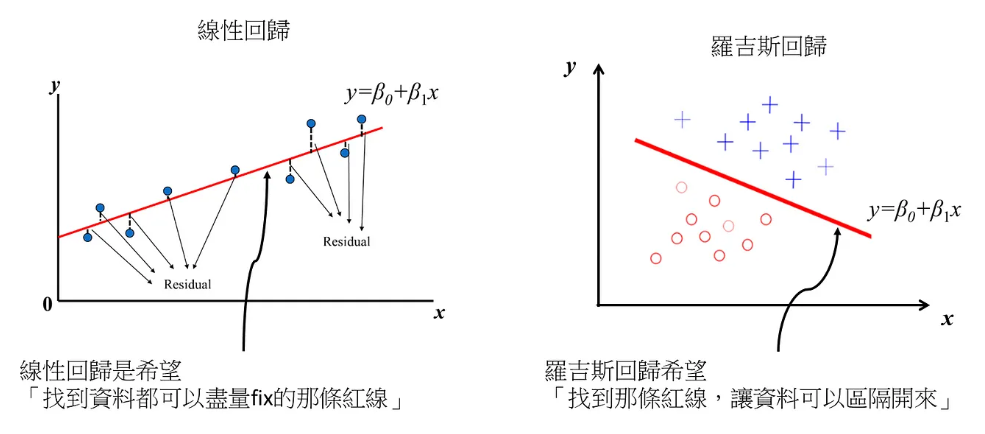   
>*參考來源: [機器/統計學習: 羅吉斯回歸(Logistic regression)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)*

從過往經驗將test_size設為0.3，而random_state隨機設為67

In [185]:
X=df.drop(['Transported'],axis=1)
y=df['Transported']
#split to training data & testing data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)


由於資料量夠大，max_iter不須設定   
由於該比賽是用accuracy，故我們只觀察此項評分系統

In [186]:
#using Logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
#Evaluate 
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy=", accuracy_score(y_test,predictions))
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not Survived', 'Predict Survived'],index=['True not Survived','True Survived'])


Accuracy= 0.7952453987730062


,Predict not Survived,Predict Survived
True not Survived,916,380
True Survived,154,1158


初步看來，Accuracy雖有80%左右，已經堪用，但還有很大的成長空間

### 優化方法一
>由於數據庫項次多，再次檢查數據並進行調整

In [178]:
df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,group,num_in_group
CryoSleep,1.000000,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,-0.107231,...,0.124049,0.028433,-0.066678,-0.110644,-0.209035,0.241399,-0.017579,-0.023858,-0.006883,0.063291
Age,-0.071323,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233,-0.200814,...,0.103305,0.126270,0.077004,0.028212,-0.017024,-0.209928,0.013734,-0.011621,-0.009099,-0.131422
VIP,-0.078281,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,-0.162345,...,0.065080,0.065591,0.067678,-0.012912,-0.054256,-0.098863,-0.003672,0.008798,0.013608,0.000703
RoomService,-0.244089,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.140483,...,-0.064536,-0.019494,0.160699,0.043935,0.092507,-0.145289,0.007525,0.006991,0.000375,-0.021750
FoodCourt,-0.205928,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.215061,...,0.155351,0.257511,0.020128,-0.038889,-0.129681,-0.149911,0.014267,-0.019682,-0.009200,0.023265
ShoppingMall,-0.207798,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.071911,...,-0.010750,0.000906,0.054823,0.031747,0.070135,-0.108538,-0.006787,0.020940,0.017796,-0.038582
Spa,-0.198307,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.159120,...,0.114257,0.163670,0.033486,-0.011736,-0.077820,-0.124342,0.036316,-0.005700,-0.005198,0.016767
VRDeck,-0.192721,0.099590,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.154064,...,0.122644,0.206639,-0.003542,-0.017905,-0.095178,-0.127434,0.012369,0.009089,0.015945,0.009686
Transported,0.460132,-0.074233,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,-0.168845,...,0.144733,0.108193,-0.034046,-0.097965,-0.086360,0.016269,-0.014568,-0.101397,0.021491,0.066390
HomePlanet_Earth,-0.107231,-0.200814,-0.162345,-0.140483,-0.215061,-0.071911,-0.159120,-0.154064,-0.168845,1.000000,...,-0.338090,-0.329965,-0.257886,-0.050725,0.063944,0.581275,-0.017007,0.018114,0.002833,-0.072830


經觀察發現deck資訊與Tranported雖有一些相關性，但其與CryoSleep, VIP, HomePlanet等都有更高的相關性   
為了避免double counting，我們嘗試不考慮deck資訊進行機器學習

In [195]:
X=df.drop(['Transported','deck_A','deck_B','deck_C','deck_D','deck_E','deck_F','deck_G','deck_T'],axis=1)
y=df['Transported']
#split to training data & testing data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)
lr=LogisticRegression().fit(X_train,y_train)
#Evaluate 
print("Accuracy=", accuracy_score(y_test,lr.predict(X_test)))
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not Survived', 'Predict Survived'],index=['True not Survived','True Survived'])

Accuracy= 0.7898773006134969


,Predict not Survived,Predict Survived
True not Survived,916,380
True Survived,154,1158


#### 結果分析一
Accuracy不增反減，約79%正確率，故我們可以推測deck資訊仍有其存在的必要   
雖然deck會與其他參數有相關，但仍然可以讓LogisticRegression()預測更加 

雖然用目前train的data結果是正確率最高約79.5%，但無法保證在test的表現，所以接下來先嘗試匯出pkl檔已進行預測

In [196]:
#Model Export
import joblib
joblib.dump(lr,'Spaceship-LR-20231102.pkl',compress=3)

['Spaceship-LR-20231102.pkl']

匯出檔案Spaceship-LR-20231102.pkl，再進行匯入作為練習

In [197]:
model_pretrained=joblib.load('Spaceship-LR-20231102.pkl')

接下來匯入test.csv並利用上述處理train.csv的手法處理test.csv


In [202]:
df_test=pd.read_csv("test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [203]:
df_test["HomePlanet"].fillna(df_test["HomePlanet"].value_counts().idxmax(),inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['HomePlanet'])
df_test.drop('HomePlanet_Mars', axis=1, inplace=True)
df_test["Destination"].fillna(df_test["Destination"].value_counts().idxmax(),inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['Destination'])
df_test.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test['deck'] = ""
df_test['side'] = ""
for index, row in df_test.iterrows():
    cabin_value = row['Cabin']
    if pd.notna(cabin_value):
        elements = cabin_value.split("/")
        if len(elements) == 3:
            df_test.at[index, 'deck'] = elements[0]
            df_test.at[index, 'side'] = elements[2]
if(df_test['deck'].value_counts().idxmax()!=""):
    df_test['deck'].replace("", df_test['deck'].value_counts().idxmax(), inplace=True)
else:
    df_test['deck'].replace("", df_test['deck'].value_counts().index[1], inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['deck'])
if(df_test['side'].value_counts().idxmax()!=""):
    df_test['side'].replace("", df_test['side'].value_counts().idxmax(), inplace=True)
else:
    df_test['side'].replace("", df_test['side'].value_counts().index[1], inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['side'])
df_test.drop("Cabin", axis=1, inplace=True, errors="ignore")
df_test.drop('side_S', axis=1, inplace=True, errors="ignore")
df_test['group'] = ""
df_test['num_in_group'] = ""
for index, row in df_test.iterrows():
    PassengerId_value = row['PassengerId']
    if pd.notna(PassengerId_value):
        elements = PassengerId_value.split("_")
        if len(elements) == 2:
            df_test.at[index, 'group'] = elements[0]
            df_test.at[index, 'num_in_group'] = elements[1]
df_test["CryoSleep"].fillna(df_test["CryoSleep"].value_counts().idxmax(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test["VIP"].fillna(df_test["VIP"].value_counts().idxmax(),inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].median(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].median(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].median(), inplace=True)
PassengerID=df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)

#Prepare submit file 
predictions2=model_pretrained.predict(df_test)
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId']=PassengerID
forSubmissionDF['Transported']=predictions2
forSubmissionDF.to_csv('for_submission_20231102.csv', index=False)

### 成績表現:
產出檔案後丟上kaggle評分做測試   
第一個保留deck版本的答案得到0.78957的正確率   
第二個不保留deck版本的答案得到0.79003的正確率
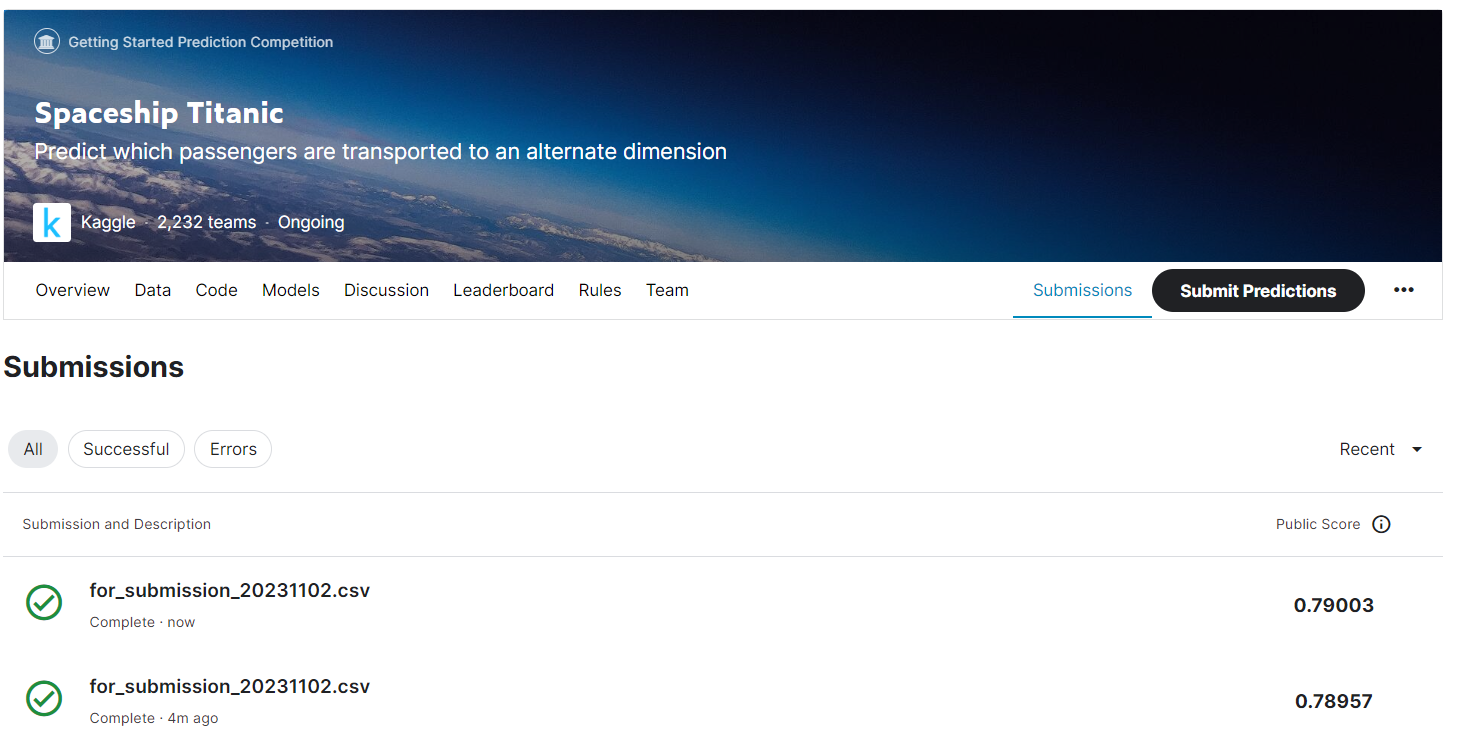
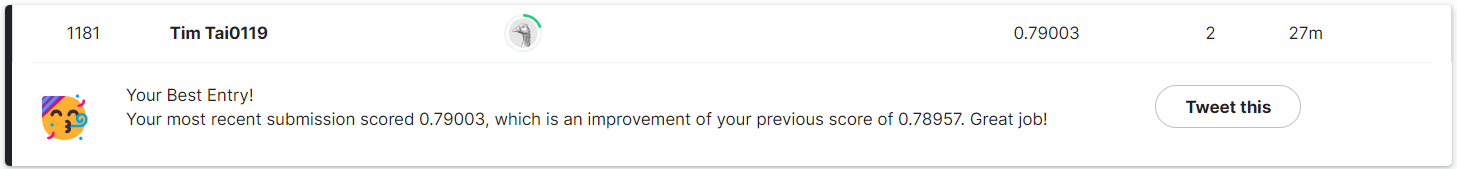

#### 結果分析二:
由此可驗證，即使在train的data中使用data_split可以自動幫我們切割訓練集與測試集，但訓練出來模型內部評分的優劣並不能直接等於真實測驗test中表現的情況，而是只能反應出模型大致的能力；這樣的隨機性也代表機器學習需要一些運氣成分。


### 優化方法二
>觀察網路上大神如何解決此問題 : 改變數據處理方式   
>*參考來源:  [PRISCA CHANG 的解題思路](https://www.kaggle.com/code/priscachang/spaceship-titanic-complete-solutions-0-80593)*

從參考資料來源中，看到一個可以很直觀進行相關性比對的功能"熱圖"，藉由不同顏色的深淺取代原本的數值，更加方便

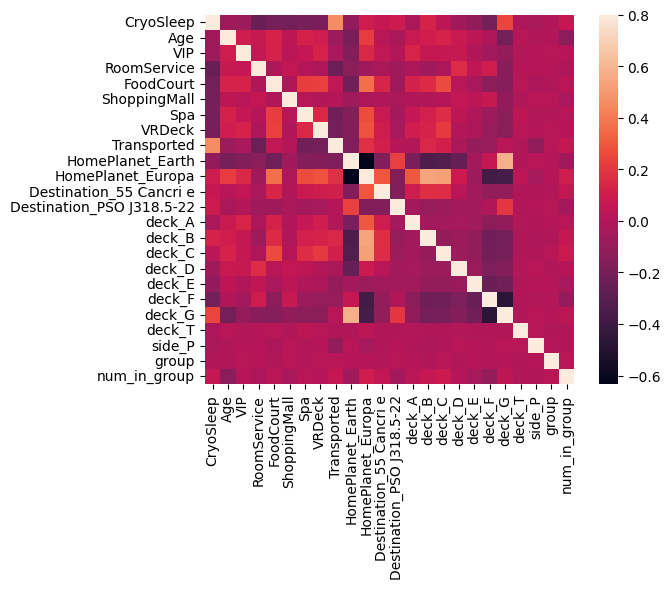

In [204]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

由上圖可發現，較白或較黑的部分就是相關性較高的參數，像是deck_F和deck_G

且數據中deck由於使用了dummy的功能，變成了很多項，這樣可能導致deck對於預測結果產生了不良的影響，因此接下來把它合併成一個deck，並用不同數值作為不同碼頭的代號。

In [267]:
#import dataset
df=pd.read_csv("C:\\Users\\timta\\Desktop\\courses\\machine learning\\local\\spaceship\\train.csv")
df["HomePlanet"].fillna(df["HomePlanet"].value_counts().idxmax(),inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['HomePlanet'])
df.drop('HomePlanet_Mars', axis=1, inplace=True)
df["Destination"].fillna(df["Destination"].value_counts().idxmax(),inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['Destination'])
df.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df['deck'] = ""
df['side'] = ""
for index, row in df.iterrows():
    cabin_value = row['Cabin']
    if pd.notna(cabin_value):
        elements = cabin_value.split("/")
        if len(elements) == 3:
            df.at[index, 'deck'] = elements[0]
            df.at[index, 'side'] = elements[2]
if(df['side'].value_counts().idxmax()!=""):
    df['side'].replace("", df['side'].value_counts().idxmax(), inplace=True)
else:
    df['side'].replace("", df['side'].value_counts().index[1], inplace=True)
df=pd.get_dummies(data=df, dtype= int, columns=['side'])
df.drop("Cabin", axis=1, inplace=True, errors="ignore")
df.drop('side_S', axis=1, inplace=True, errors="ignore")
df['group'] = ""
df['num_in_group'] = ""
for index, row in df.iterrows():
    PassengerId_value = row['PassengerId']
    if pd.notna(PassengerId_value):
        elements = PassengerId_value.split("_")
        if len(elements) == 2:
            df.at[index, 'group'] = elements[0]
            df.at[index, 'num_in_group'] = elements[1]
df["CryoSleep"].fillna(df["CryoSleep"].value_counts().idxmax(),inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df["VIP"].fillna(df["VIP"].value_counts().idxmax(),inplace=True)
df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)
PassengerID=df['PassengerId']
df.drop('PassengerId', axis=1, inplace=True)


運用sns的countplot去觀察每一個deck的關係，並針對這個特徵去賦予他們對應的數值

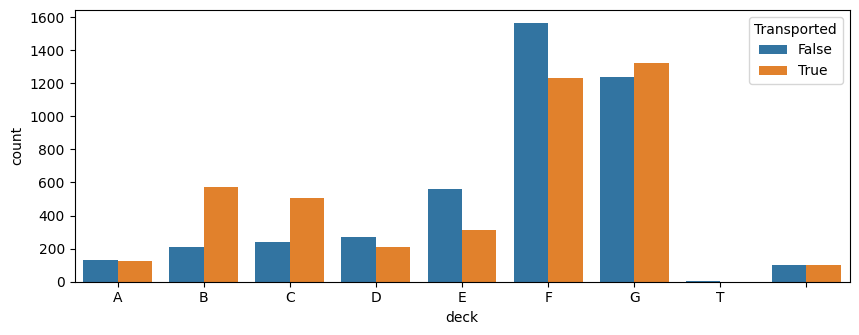

In [268]:
fig = plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
df['Transported'] = df['Transported'].astype(str)
sns.countplot(data=df, x='deck', hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', ''])
plt.show()

從上圖可發現，"B"與"C"的特徵相似，"G","","A"相似等等，這些特徵協助我們將類似的分布情形歸類的同一個編號

In [269]:
deck_mapping = {"B": 1, "C": 1, "G": 2, "": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
# Use the .apply() method to map 'deck' values in the DataFrame
df['deck'] = df['deck'].apply(lambda x: deck_mapping.get(x, x))
df['deck'].value_counts()
df['Transported'] = df['Transported'].map({'False': 0, 'True': 1})

從參考資料中有了新的資料庫處理後，我們再來是一次logistic regression的預測

In [270]:
X=df.drop('Transported',axis=1)
y=df['Transported']
#split to training data & testing data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)
lr=LogisticRegression().fit(X_train,y_train)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
print("Accuracy=", accuracy_score(y_test,predictions))
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not Survived', 'Predict Survived'],index=['True not Survived','True Survived'])

Accuracy= 0.7871932515337423


,Predict not Survived,Predict Survived
True not Survived,924,372
True Survived,183,1129


以自評來看，預測結果並沒有比較好，僅0.7872的Accuracy

In [272]:
#Model Export
import joblib
joblib.dump(lr,'Spaceship-LR-20231102.pkl',compress=3)
model_pretrained=joblib.load('Spaceship-LR-20231102.pkl')
df_test=pd.read_csv("test.csv")
df_test["HomePlanet"].fillna(df_test["HomePlanet"].value_counts().idxmax(),inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['HomePlanet'])
df_test.drop('HomePlanet_Mars', axis=1, inplace=True)
df_test["Destination"].fillna(df_test["Destination"].value_counts().idxmax(),inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['Destination'])
df_test.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test['deck'] = ""
df_test['side'] = ""
for index, row in df_test.iterrows():
    cabin_value = row['Cabin']
    if pd.notna(cabin_value):
        elements = cabin_value.split("/")
        if len(elements) == 3:
            df_test.at[index, 'deck'] = elements[0]
            df_test.at[index, 'side'] = elements[2]
deck_mapping = {"B": 1, "C": 1, "G": 2, "": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
# Use the .apply() method to map 'deck' values in the DataFrame
df_test['deck'] = df_test['deck'].apply(lambda x: deck_mapping.get(x, x))

if(df_test['side'].value_counts().idxmax()!=""):
    df_test['side'].replace("", df_test['side'].value_counts().idxmax(), inplace=True)
else:
    df_test['side'].replace("", df_test['side'].value_counts().index[1], inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['side'])
df_test.drop("Cabin", axis=1, inplace=True, errors="ignore")
df_test.drop('side_S', axis=1, inplace=True, errors="ignore")
df_test['group'] = ""
df_test['num_in_group'] = ""
for index, row in df_test.iterrows():
    PassengerId_value = row['PassengerId']
    if pd.notna(PassengerId_value):
        elements = PassengerId_value.split("_")
        if len(elements) == 2:
            df_test.at[index, 'group'] = elements[0]
            df_test.at[index, 'num_in_group'] = elements[1]
df_test["CryoSleep"].fillna(df_test["CryoSleep"].value_counts().idxmax(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test["VIP"].fillna(df_test["VIP"].value_counts().idxmax(),inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].median(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].median(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].median(), inplace=True)
PassengerID=df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)

#Prepare submit file 
predictions2=model_pretrained.predict(df_test)
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId']=PassengerID
forSubmissionDF['Transported'] = predictions2.astype(bool)
forSubmissionDF.to_csv('for_submission_20231102.csv', index=False)


分數有所進步，但仍然未達目標
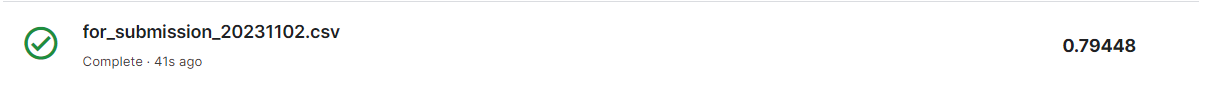

既然在資料處理方面比較難有突破，接下來嘗試其他的regression model

### 優化方法三
>觀察網路上大神如何解決此問題 : 換成使用  Gradient Boosting Classifier   
>*參考來源:  [SAGOUMA MOHAMED SOFIANE 的解題思路](https://www.kaggle.com/code/mesofianeyou/spaceship-titanic-eda-fi-80-of-accuracy)*,  

Gradient Boosting Classifier（梯度提升分類器）是一種強大的監督學習演算法，以下是一些Gradient Boosting Classifier的主要特點：   

1. 集成學習：Gradient Boosting Classifier是一種集成學習演算法，它通過結合多個弱分類器來構建一個更強大的分類器。
2. 適應性：Gradient Boosting Classifier能夠適應不同類型的數據和問題，包括分類和回歸問題。它在處理複雜問題時表現出色。
3. 準確性：Gradient Boosting Classifier通常以高準確性著稱。它在許多比賽和實際應用中表現出色，因為它可以減少偏差和方差，提高泛化性能。
4. 處理不平衡數據：Gradient Boosting Classifier可以有效地處理不平衡的數據集，通過加權樣本來關注較少出現的類別，從而改善模型的性能。
5. 特徵重要性：它可以提供有關特徵的重要性信息，幫助您了解哪些特徵對於模型的決策最為關鍵。
6. 可解釋性：雖然它不像線性模型那樣容易解釋，但通過特徵重要性和樹結構，您可以獲得一些關於模型決策的洞見。
7. 自動處理缺失值：Gradient Boosting Classifier能夠處理包含缺失值的數據，無需額外的數據處理步驟。
>*參考來源:  ChatGPT*

In [274]:
#### Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy=", accuracy)
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not Survived', 'Predict Survived'],index=['True not Survived','True Survived'])

Accuracy= 0.8098159509202454


,Predict not Survived,Predict Survived
True not Survived,924,372
True Survived,183,1129


用訓練集切分出來自我評分的結果看起來十分樂觀，正確可達0.8098159509202454，接下來輸出模型並放進kaggle評分

In [277]:
#Model Export
joblib.dump(gbc,'Spaceship-gbc-20231102.pkl',compress=3)
model_pretrained=joblib.load('Spaceship-gbc-20231102.pkl')
df_test=pd.read_csv("test.csv")
df_test["HomePlanet"].fillna(df_test["HomePlanet"].value_counts().idxmax(),inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['HomePlanet'])
df_test.drop('HomePlanet_Mars', axis=1, inplace=True)
df_test["Destination"].fillna(df_test["Destination"].value_counts().idxmax(),inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['Destination'])
df_test.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test['deck'] = ""
df_test['side'] = ""
for index, row in df_test.iterrows():
    cabin_value = row['Cabin']
    if pd.notna(cabin_value):
        elements = cabin_value.split("/")
        if len(elements) == 3:
            df_test.at[index, 'deck'] = elements[0]
            df_test.at[index, 'side'] = elements[2]
deck_mapping = {"B": 1, "C": 1, "G": 2, "": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
# Use the .apply() method to map 'deck' values in the DataFrame
df_test['deck'] = df_test['deck'].apply(lambda x: deck_mapping.get(x, x))

if(df_test['side'].value_counts().idxmax()!=""):
    df_test['side'].replace("", df_test['side'].value_counts().idxmax(), inplace=True)
else:
    df_test['side'].replace("", df_test['side'].value_counts().index[1], inplace=True)
df_test=pd.get_dummies(data=df_test, dtype= int, columns=['side'])
df_test.drop("Cabin", axis=1, inplace=True, errors="ignore")
df_test.drop('side_S', axis=1, inplace=True, errors="ignore")
df_test['group'] = ""
df_test['num_in_group'] = ""
for index, row in df_test.iterrows():
    PassengerId_value = row['PassengerId']
    if pd.notna(PassengerId_value):
        elements = PassengerId_value.split("_")
        if len(elements) == 2:
            df_test.at[index, 'group'] = elements[0]
            df_test.at[index, 'num_in_group'] = elements[1]
df_test["CryoSleep"].fillna(df_test["CryoSleep"].value_counts().idxmax(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test["VIP"].fillna(df_test["VIP"].value_counts().idxmax(),inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].median(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].median(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].median(), inplace=True)
PassengerID=df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)

#Prepare submit file 
predictions2=model_pretrained.predict(df_test)
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId']=PassengerID
forSubmissionDF['Transported'] = predictions2.astype(bool)
forSubmissionDF.to_csv('for_submission_20231102.csv', index=False)


#### 成功!!!拿下0.80523的Accuracy，並擠進前242名!
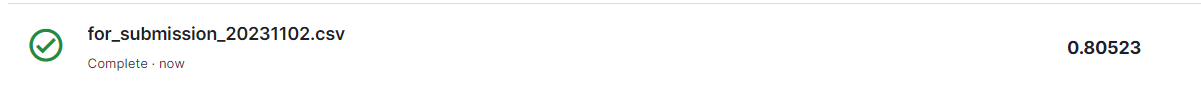
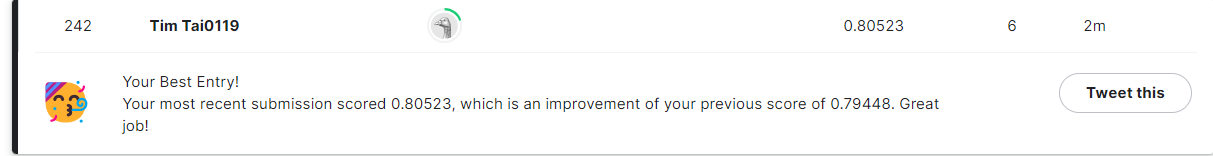

## 實驗總結
1. 原始作法: 依照課堂教學，利用中位數或者最頻繁出現的元素填補空值，並利用dummy_variable處理非數值變數，採用所有參數進行Logistic Regression，分數達0.78957
2. 優化方法一: 觀察部份數據後，發覺有些數據可能相關性很高，會有double counting的問題，忽略deck後，分數不顯著提高至0.79003
3. 優化方法二: 參考PRISCA CHANG，了解用熱度表觀測數據的方法，以及用map處理數據的方式，將deck從多項的dummy型態依照其特性轉化成特定數值，分數達0.79448
4. 優化方法三: 參考SAGOUMA MOHAMED SOFIANE，認識多個回歸模型，並挑選其中表現最佳者實作，經實作Gradient Boosting Classifier後分數達到0.80523，達成目標!